In [16]:
import pandas as pd
import numpy as np
import shap
import joblib 
import matplotlib.pyplot as plt
from IPython.display import display, Image

shap.initjs()

rf_model=joblib.load("../models/risk_model.pkl")
scaler= joblib.load("../models/scaler.pkl")

df= pd.read_csv("../intermediate/user_features_clustered.csv")
y= df["risk_level"]

col_to_use = [
    'age', 'income', 'experience_years', 'risk_survey_score',
    'total_transactions', 'avg_amount', 'active_days', 'monthly_freq',
    'tx_count_30d', 'pct_crypto', 'pct_etf', 'pct_forex', 'pct_other',
    'pct_stocks', 'pct_bond', 'volatility_mean_30', 'volatility_mean_60',
    'volatility_std_30', 'cluster_label'
]

X=df[col_to_use]

X_scaled =scaler.transform(X)


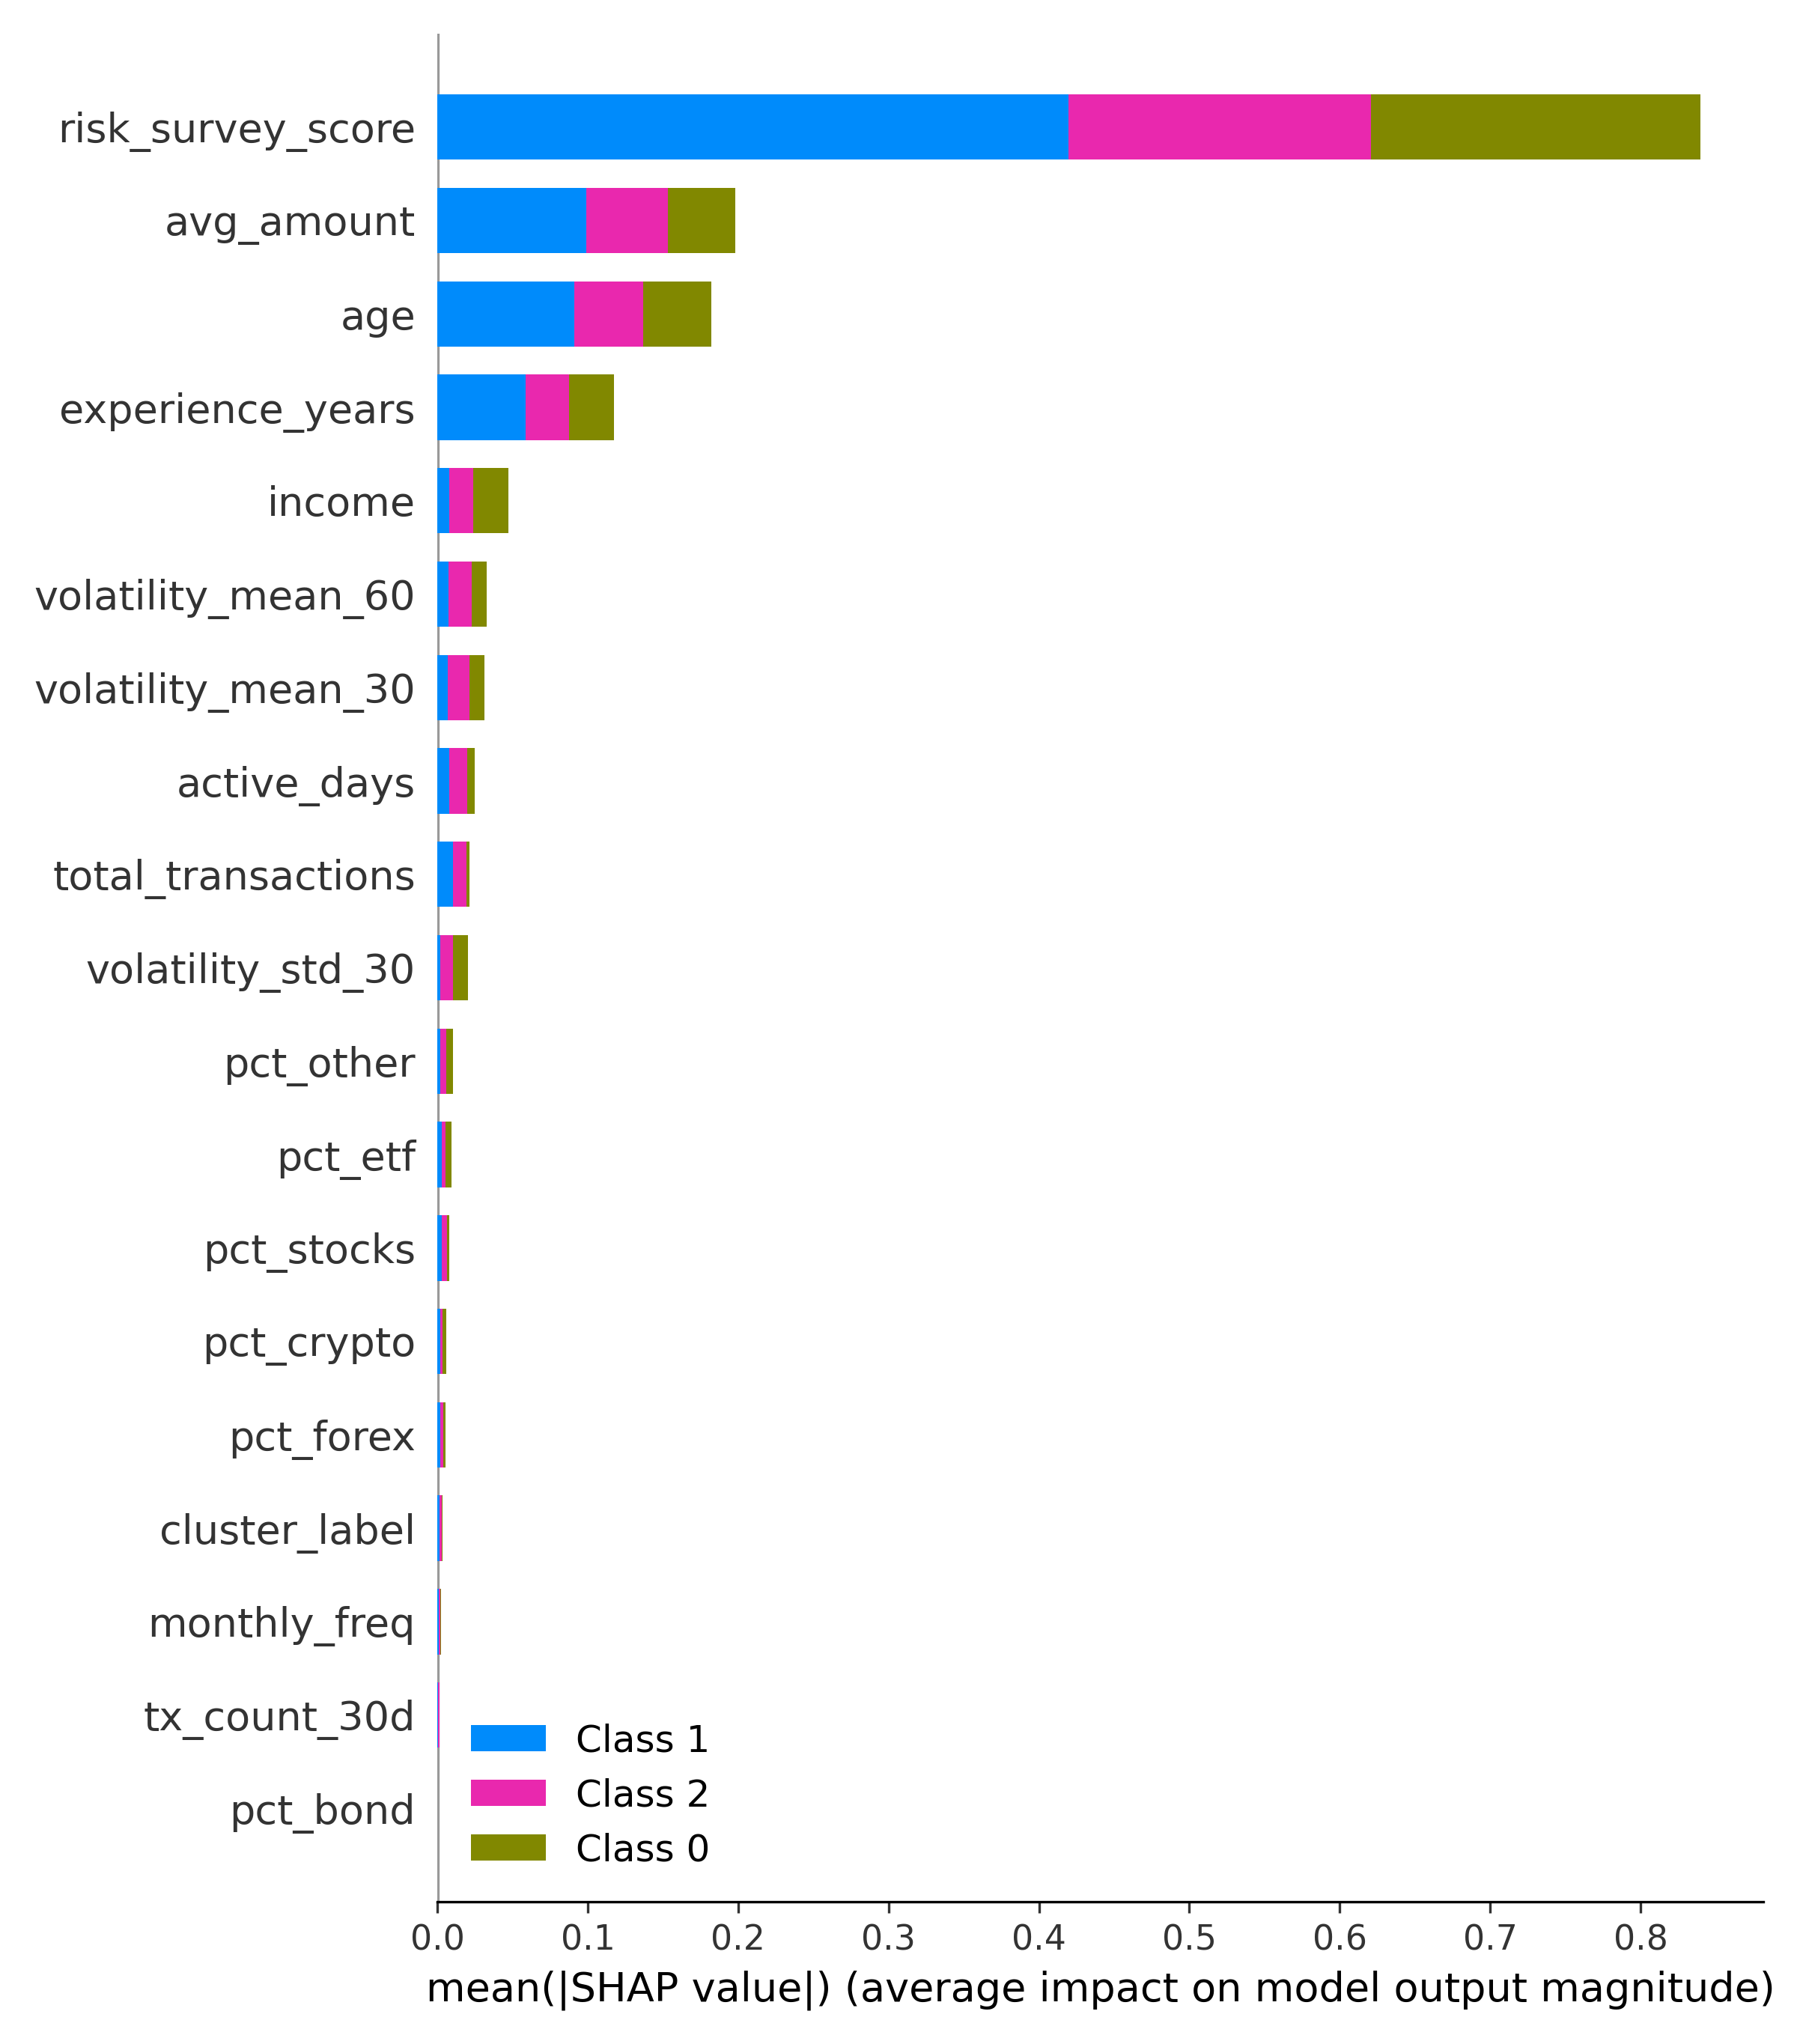

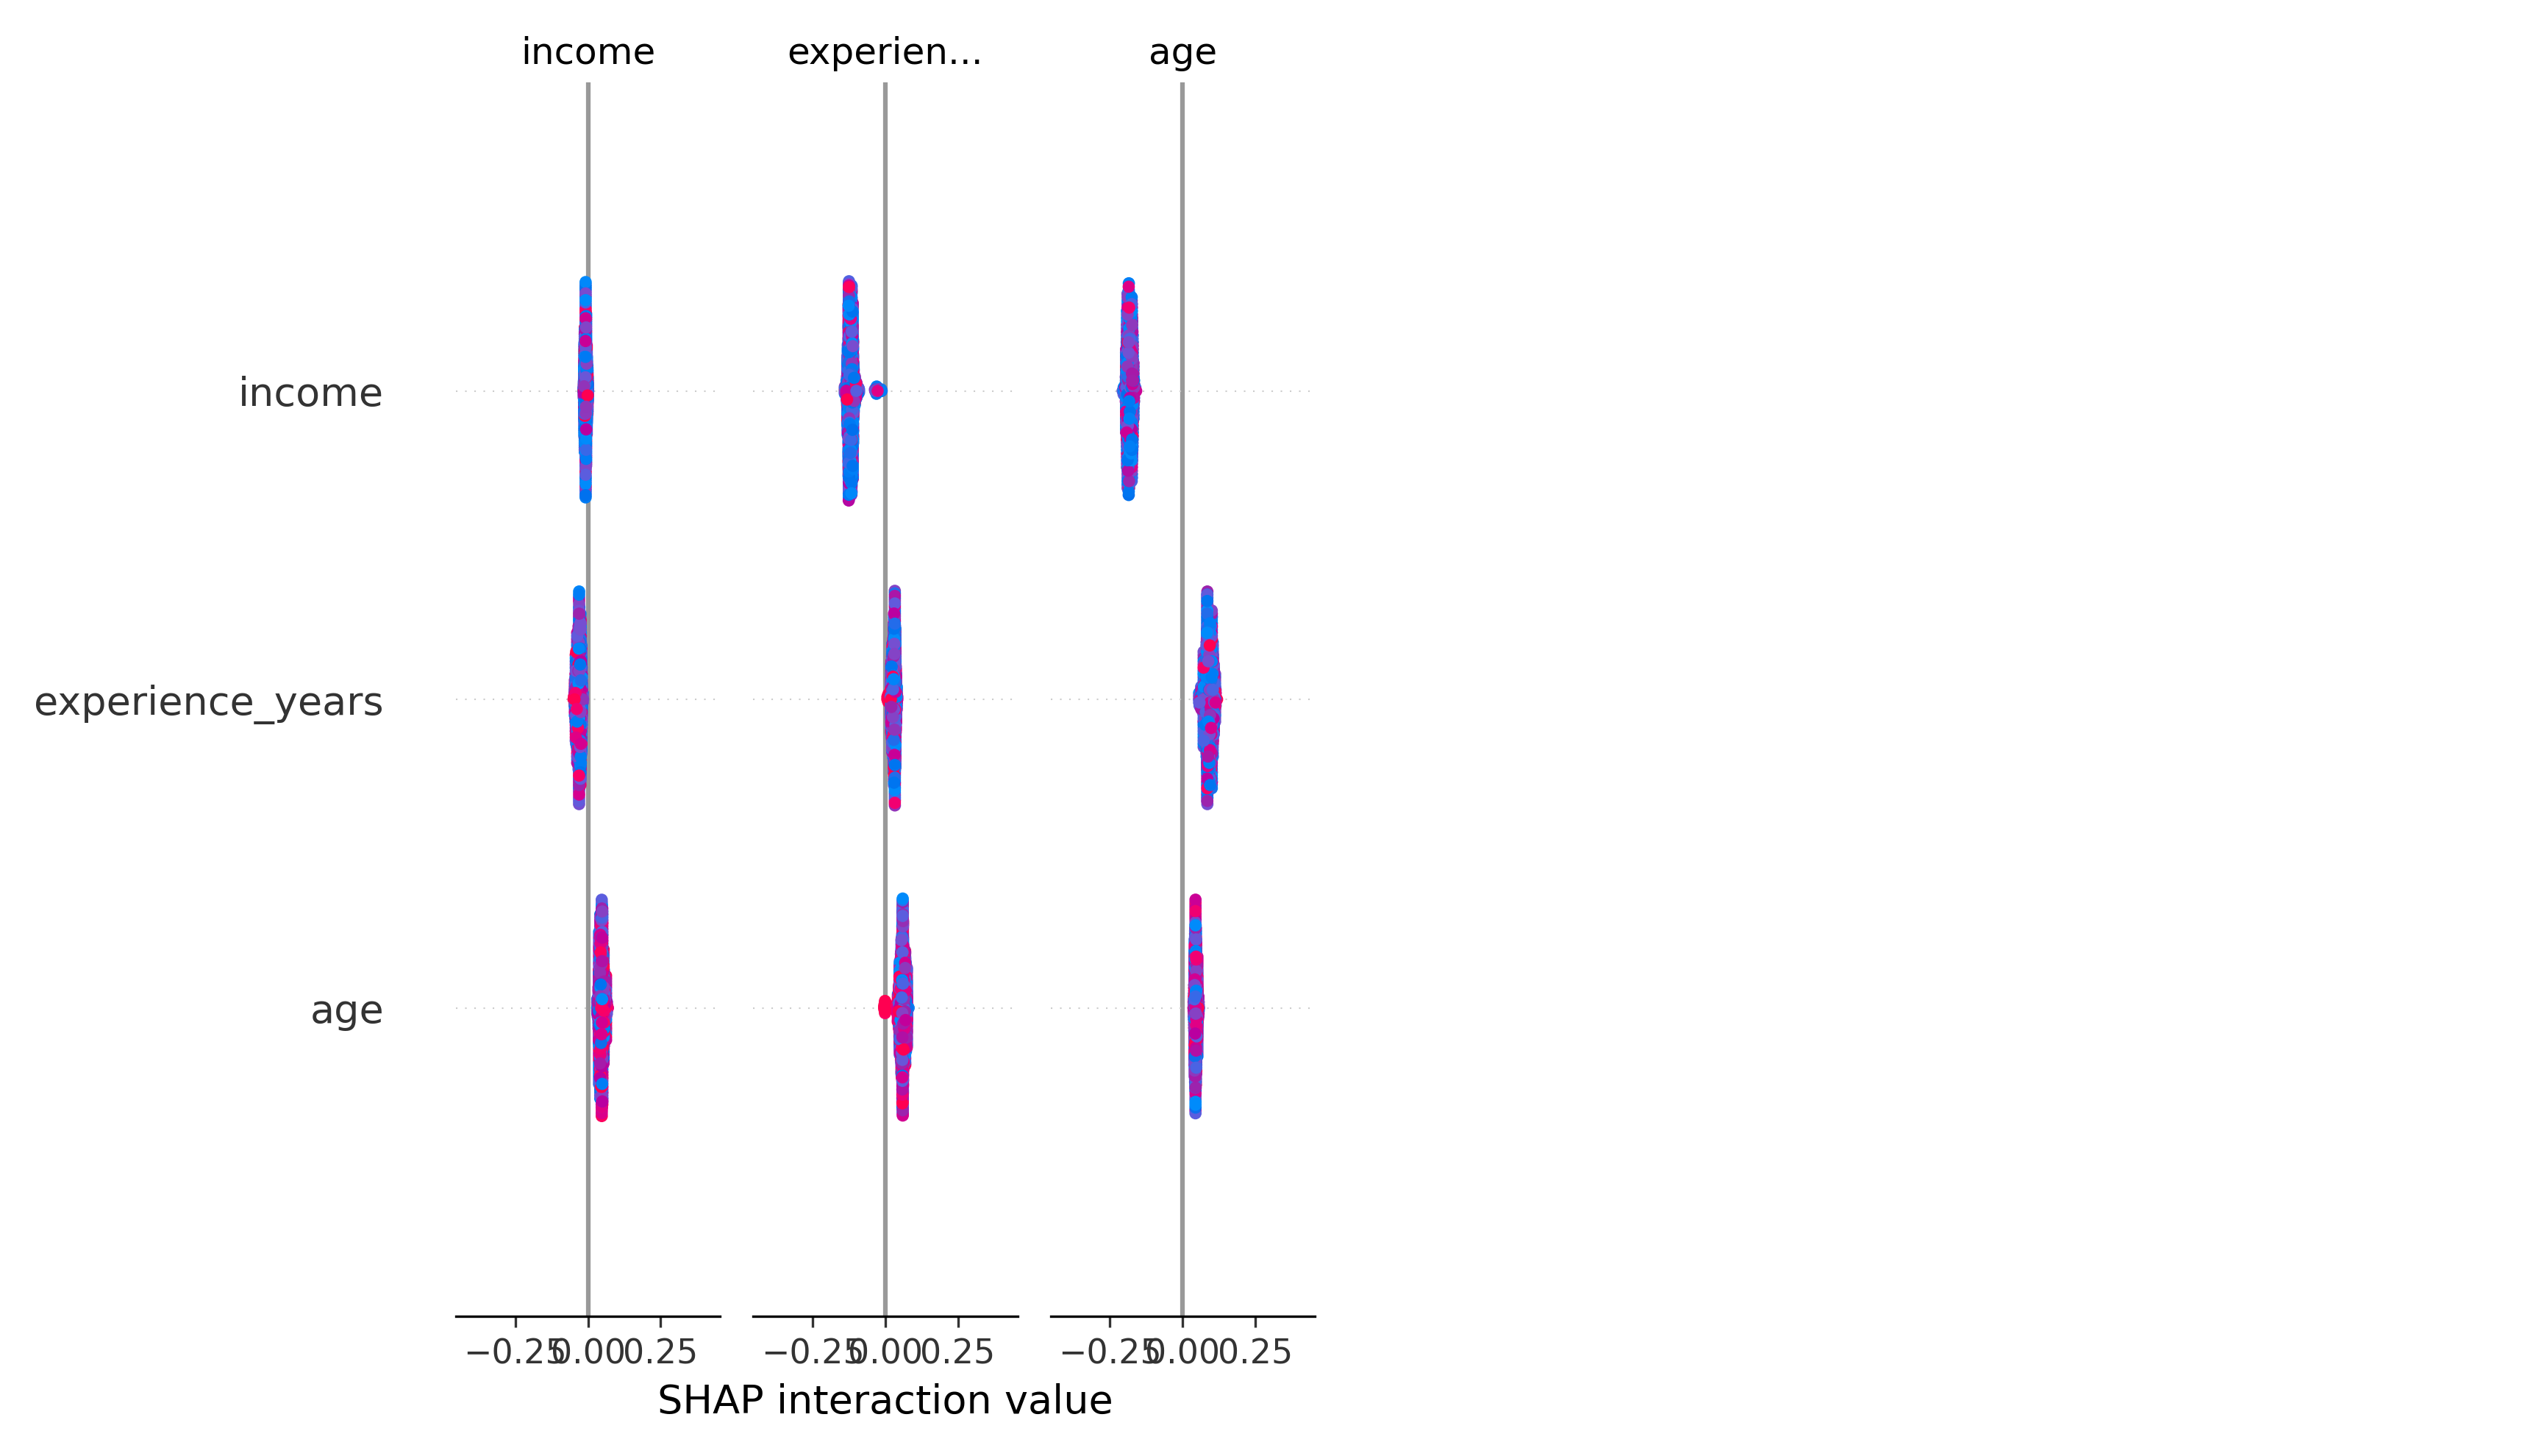

In [18]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_scaled)

# Bar plot
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.tight_layout()
plt.savefig("../reports/shap_summary.png", dpi=300)
plt.close()  

# Dot plot
shap.summary_plot(shap_values, X, show=False)
plt.tight_layout()
plt.savefig("../reports/shap_summary_dot.png", dpi=300)
plt.close()


display(Image("../reports/shap_summary.png"))
display(Image("../reports/shap_summary_dot.png"))


SHAP Feature Importance — Global Insights

The SHAP analysis reveals which features the Random Forest model considers most influential in predicting users’ risk levels.

Key Findings:

Risk Survey Score: This is the most important predictor, confirming that self reported survey responses strongly correlate with risk levels.

Total Transactions & Avg Amount: Users with higher transaction counts and average transaction amounts tend to have higher predicted risk levels.

Cluster Label: The assigned user cluster is also a strong predictor, highlighting that behavioral segmentation adds valuable information.

Portfolio Composition Features (pct_crypto, pct_stocks, pct_etf, etc.): These features moderately influence predictions, showing that asset allocation patterns matter.

Volatility Metrics (volatility_mean_30/60, volatility_std_30): These have a minor effect, suggesting that short term portfolio volatility has less predictive power than survey and transaction metrics.

Demographics (age, income, experience_years): These features are less influential compared to behavioral and survey features, indicating that usage behavior outweighs static demographic characteristics.

Visual Summary:

Bar Plot: Displays the mean absolute SHAP value for each feature  higher bars indicate stronger influence.

Dot Plot: Shows the distribution of SHAP values for all users  the color gradient reflects feature values and their impact on risk prediction.

Interpretation:
The model relies primarily on survey responses and behavioral activity, with clusters helping to contextualize risk patterns. Investment portfolios and transaction behavior provide secondary signals. Demographic features play a minor role.

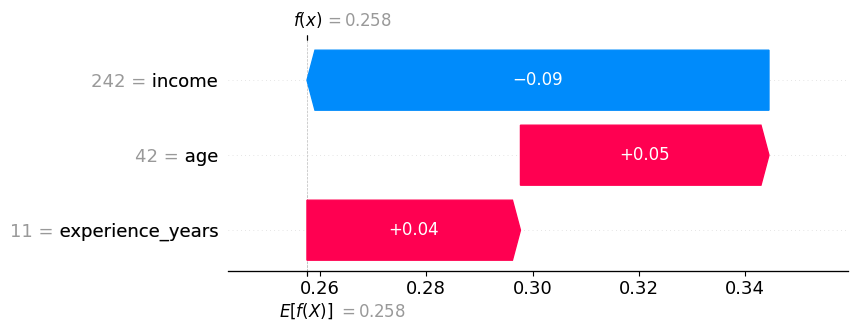

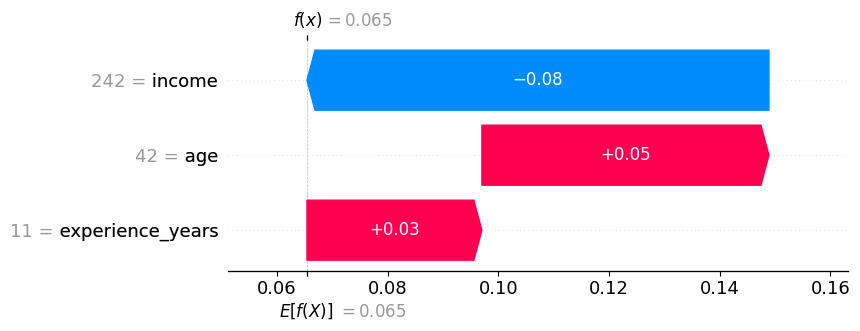

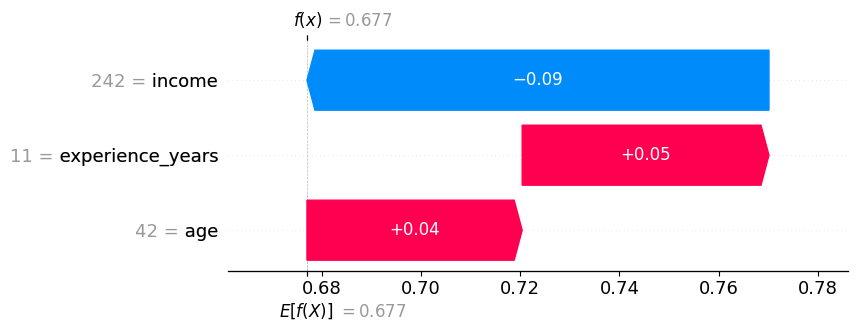

In [19]:
# High risk user 
exp_high = shap.Explanation(
    values=shap_values[0][0],
    base_values=explainer.expected_value[0],
    data=X.iloc[0]
)
shap.plots.waterfall(exp_high)

# Low risk user 
exp_low = shap.Explanation(
    values=shap_values[1][0],
    base_values=explainer.expected_value[1],
    data=X.iloc[0]
)
shap.plots.waterfall(exp_low)

# Medium risk user
exp_medium = shap.Explanation(
    values=shap_values[2][0],
    base_values=explainer.expected_value[2],
    data=X.iloc[0]
)
shap.plots.waterfall(exp_medium)


SHAP Waterfall Plots — Class Specific Insights

High Risk User
Observation: The model predicts this user as high risk primarily due to high `risk_survey_score` and elevated `total_transactions`.
Behavioral Features: High transaction counts and portfolio activity contribute positively to the risk prediction.
Portfolio Composition:Higher percentages in volatile assets (like `pct_crypto`) slightly increase predicted risk.
Demographics: Age, income, and experience_years have minor contributions.
Interpretation:Survey responses and active trading behavior are the main drivers for high risk classification.

Low Risk User
Observation:The model predicts low risk mainly because of low `risk_survey_score` and moderate transaction activity.
Behavioral Features: Low transaction counts and lower engagement in risky assets reduce predicted risk.
Portfolio Composition: Lower exposure to volatile assets (crypto, stocks) contributes to low risk prediction.
Demographics: Again, age, income, and experience_years play a minor role.
Interpretation: Low survey scores and conservative trading patterns lead to a low risk classification.

Medium Risk User
Observation: This user is classified as medium risk primarily due to mid range `risk_survey_score` and moderate transaction patterns.
Behavioral Features: Transaction frequency and average amounts have a moderate impact on risk.
Portfolio Composition: Exposure to a mix of assets contributes partially to the predicted risk.
Demographics:Minimal effect on prediction.
Interpretation: The medium risk prediction results from balanced survey responses and trading behavior; neither highly conservative nor aggressive.
